In [24]:
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pywaffle import Waffle
import matplotlib.pylab as pylab
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import numpy as np
import altair as alt
from vega_datasets import data

In [25]:
df = pd.read_csv("NYC Open Databases\Rat_Sightings.csv", low_memory=False)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,15636547,01/02/2010 09:38:29 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11432.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)"
1,15636689,01/02/2010 07:09:56 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Catch Basin/Sewer,11204.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.608288,-73.977775,"(40.60828832742201, -73.97777515791093)"
2,15636710,01/02/2010 09:04:46 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11375.0,68-12 YELLOWSTON BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726060,-73.848329,"(40.726059538480236, -73.84832900182792)"
3,15636731,01/02/2010 06:27:59 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11233.0,1040 HERKIMER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677957,-73.918921,"(40.67795748580213, -73.91892129635086)"
4,15636907,01/02/2010 12:50:16 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10034.0,241 SHERMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.866008,-73.919401,"(40.86600810878767, -73.9194006525354)"


In [26]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                     float64
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

In [27]:
df['year'] = pd.DatetimeIndex(df['Created Date']).year
df['year']

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
220512    2023
220513    2023
220514    2023
220515    2023
220516    2023
Name: year, Length: 220517, dtype: int32

In [28]:
year_borough = df.groupby('year').Borough.value_counts().reset_index()
year_borough

,year,Borough,count
0,2010,BROOKLYN,3399
1,2010,MANHATTAN,2867
2,2010,BRONX,2067
3,2010,QUEENS,1569
4,2010,STATEN ISLAND,632
...,...,...,...
70,2023,MANHATTAN,3186
71,2023,QUEENS,2073
72,2023,BRONX,1608
73,2023,STATEN ISLAND,312


In [29]:
year2020 = year_borough.loc[year_borough['year'] == 2020]
year2020

,year,Borough,count
53,2020,BROOKLYN,5995
54,2020,MANHATTAN,4180
55,2020,BRONX,2762
56,2020,QUEENS,2711
57,2020,STATEN ISLAND,614


In [30]:
year2020['count'].sum()

16262

<Axes: xlabel='Borough'>

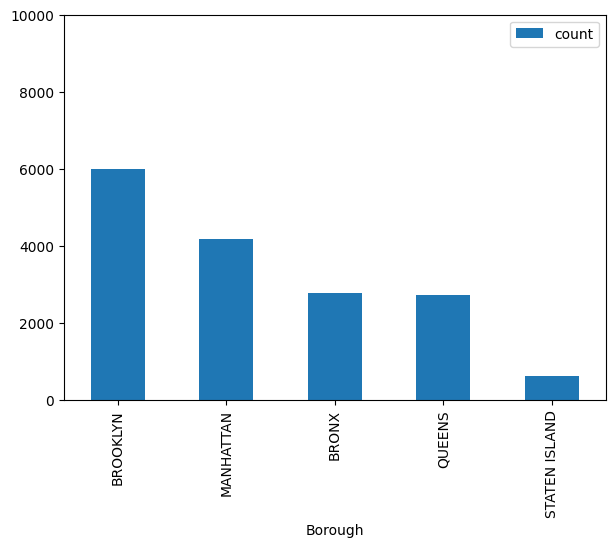

In [31]:
year2020.sort_values(by='count', ascending=False).plot(x='Borough', y='count', ylim=(0, 10000), kind='bar', figsize=(7,5))

In [32]:
bars2020 = alt.Chart(year2020.head(5)).mark_bar(size=75).encode(
    x = alt.X("count", title="Number of Complains"),
    y = alt.Y('Borough:N', title="NYC Boroughs").sort('-x'),
    color= alt.condition(
        alt.datum.count > 5500, 
        alt.value("red"),
        alt.value("steelblue"))
)

text2020 = bars2020.mark_text(
    align='left',
    baseline='middle',
    dx=3,  # Nudges text to right so it doesn't appear on top of the bar
    fontStyle='bold',
    fontSize= 15
).encode(text='count:Q')

complains2020 = (bars2020 + text2020).properties(width = 'container', height = 600, 
    title = "311 calls for rodent complaints (2020)").configure_title(
    fontSize=20).configure_view(strokeWidth=0).configure_axis(labelFontSize=13,
    titleFontSize=18, grid=False)

complains2020

alt.LayerChart(...)

In [10]:
complains2020.save('complaints by borough 2020.html', embed_options={'renderer':'svg'})

In [33]:
year2021 = year_borough.loc[year_borough['year'] == 2021]
year2021

,year,Borough,count
58,2021,BROOKLYN,9500
59,2021,MANHATTAN,6947
60,2021,BRONX,4469
61,2021,QUEENS,3400
62,2021,STATEN ISLAND,694


In [34]:
year2021['count'].sum()

25010

<Axes: xlabel='Borough'>

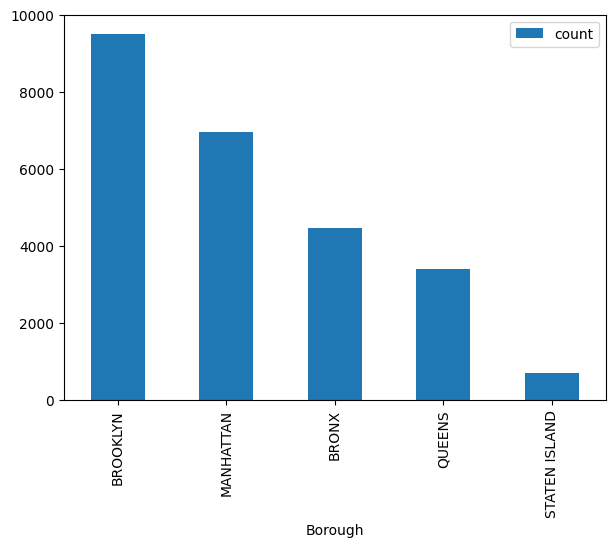

In [35]:
year2021.sort_values(by='count', ascending=False).plot(x='Borough', y='count', ylim=(0, 10000), kind='bar', figsize=(7,5))

In [37]:
bars2021 = alt.Chart(year2021.head(5)).mark_bar(size=75).encode(
    x = alt.X("count", title="Number of Complains"),
    y = alt.Y('Borough:N', title="NYC Boroughs").sort('-x'),
    color= alt.condition(
        alt.datum.count > 9000, 
        alt.value("red"),
        alt.value("steelblue"))
)

text2021 = bars2021.mark_text(
    align='left',
    baseline='middle',
    dx=3,  # Nudges text to right so it doesn't appear on top of the bar
    fontStyle='bold',
    fontSize= 15
).encode(text='count:Q')

complains2021 = (bars2021 + text2021).properties(width = 'container', height = 600, 
    title = "311 calls for rodent complaints (2021)").configure_title(
    fontSize=20).configure_view(strokeWidth=0).configure_axis(labelFontSize=13,
    titleFontSize=18, grid=False)

complains2021

alt.LayerChart(...)

In [138]:
complains2021.save('complaints by borough 2021.html', embed_options={'renderer':'svg'})

In [38]:
year2022 = year_borough.loc[year_borough['year'] == 2022]
year2022

,year,Borough,count
63,2022,BROOKLYN,10122
64,2022,MANHATTAN,7455
65,2022,BRONX,4127
66,2022,QUEENS,4092
67,2022,STATEN ISLAND,700
68,2022,Unspecified,4


In [39]:
year2022['count'].sum()

26500

<Axes: xlabel='Borough'>

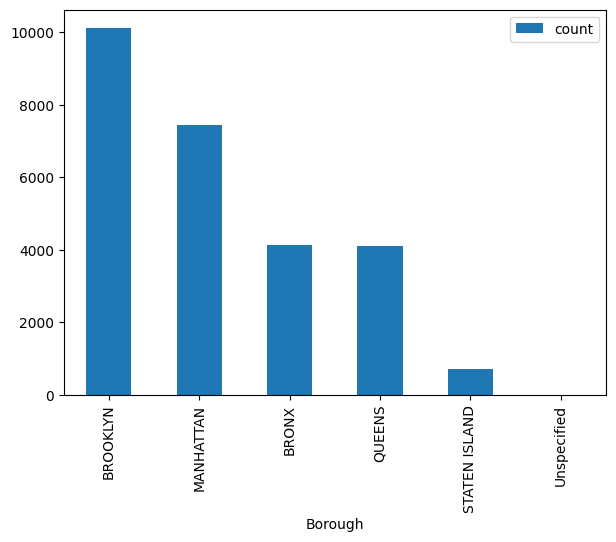

In [40]:
year2022.sort_values(by='count', ascending=False).plot(x='Borough', y='count', kind='bar', figsize=(7,5))

In [42]:
bars2022 = alt.Chart(year2022.head(5)).mark_bar(size=75).encode(
    x = alt.X("count", title="Number of Complains"),
    y = alt.Y('Borough:N', title="NYC Boroughs").sort('-x'),
    color= alt.condition(
        alt.datum.count > 10000, 
        alt.value("red"),
        alt.value("steelblue"))
)

text2022 = bars2022.mark_text(
    align='left',
    baseline='middle',
    dx=3,  # Nudges text to right so it doesn't appear on top of the bar
    fontStyle='bold',
    fontSize= 15
).encode(text='count:Q')

complains2022 = (bars2022 + text2022).properties(width = 'container', height = 600, 
    title = "311 calls for rodent complaints (2022)").configure_title(
    fontSize=20).configure_view(strokeWidth=0).configure_axis(labelFontSize=13,
    titleFontSize=18, grid=False)

complains2022

alt.LayerChart(...)

In [144]:
complains2022.save('complaints by borough 2022.html', embed_options={'renderer':'svg'})

In [43]:
year2023 = year_borough.loc[year_borough['year'] == 2023]
year2023

,year,Borough,count
69,2023,BROOKLYN,4745
70,2023,MANHATTAN,3186
71,2023,QUEENS,2073
72,2023,BRONX,1608
73,2023,STATEN ISLAND,312
74,2023,Unspecified,3


In [44]:
year2023['count'].sum()

11927

<Axes: xlabel='Borough'>

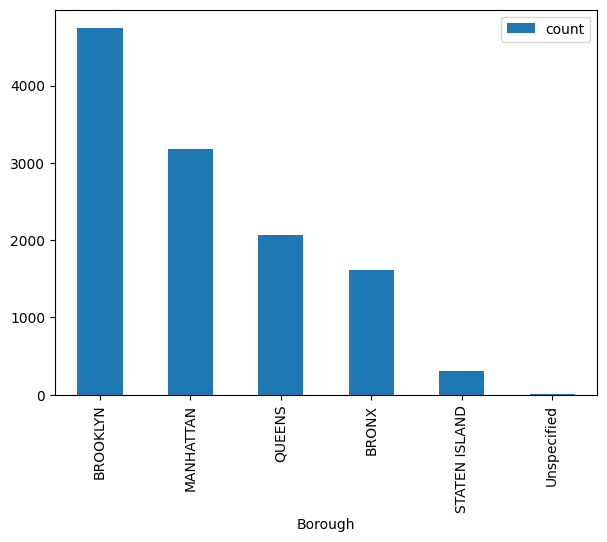

In [45]:
year2023.sort_values(by='count', ascending=False).plot(x='Borough', y='count', kind='bar', figsize=(7,5))

In [46]:
bars2023 = alt.Chart(year2023.head(5)).mark_bar(size=75).encode(
    x = alt.X("count", title="Number of Complains"),
    y = alt.Y('Borough:N', title="NYC Boroughs").sort('-x'),
    color= alt.condition(
        alt.datum.count > 4500, 
        alt.value("red"),
        alt.value("steelblue"))
)

text2023 = bars2023.mark_text(
    align='left',
    baseline='middle',
    dx=3,  # Nudges text to right so it doesn't appear on top of the bar
    fontStyle='bold',
    fontSize= 15
).encode(text='count:Q')

complains2023 = (bars2023 + text2023).properties(width = 'container', height = 600, 
    title = "311 calls for rodent complaints (2023)").configure_title(
    fontSize=20).configure_view(strokeWidth=0).configure_axis(labelFontSize=13,
    titleFontSize=18, grid=False)

complains2023

alt.LayerChart(...)

In [153]:
complains2023.save('complaints by borough 2023.html', embed_options={'renderer':'svg'})